In [1]:
push!(LOAD_PATH, "../src")

using MyProject.StochasticLanczos
using SparseArrays
using LinearAlgebra
using FastExpm  # For computing matrix exponentials as a benchmark
using Plots

Import the test case. This includes the sparse matrix A, along with the matrix function f(A) = exp(A), and its exact computation

In [2]:
include("test_cases/test_case_1.jl");

Now test the implementation of the stochastic Lanczos quadrature by comparing the approximate calculation with the exact calculation of $\Omega^\top f(A)\Omega$ where $\Omega\in \mathbb{R}^{n\times b}$ is a matrix whose columns $\omega_i$ are random samples. Note that $b$ is the block size.

In [3]:
b = 3
Ω = randn(n,b)
# Ω = hcat([ ω/norm(ω) for ω in eachcol(Ω) ]...)

100×3 Matrix{Float64}:
 -1.11286    -0.255481   -0.251541
  1.23188    -0.351664   -0.0243643
  0.860038   -0.65211    -0.526208
  0.230052   -0.990839   -1.53337
  0.0984997  -0.0220316  -0.0111731
  0.846456    0.847146    1.46468
  0.372997    0.912067    2.73715
 -0.839481    1.60562     1.11831
  0.997537    2.23653     1.24834
  0.0982348   0.949994   -1.00209
  ⋮                      
  0.0628808  -0.723564    0.673699
 -1.05828     0.757813   -1.86488
  1.5402     -0.1152     -1.69977
 -0.0822216   2.02886    -0.259343
 -0.261748    1.2229      1.51783
 -0.609228   -0.682771    1.47589
 -0.287417    0.201732    0.0843108
  0.335227    0.49153     0.603808
 -0.362666    0.778733    0.122079

In [4]:
k = 10
T_k = lanczos(matvecA, Ω[:, 1], k)
eigen(T_k).vectors

10×10 Matrix{Float64}:
  0.108667  -0.249475   -0.506058   …   0.201658  -0.105663  0.0681509
 -0.183522   0.348313    0.494785       0.394634  -0.238229  0.302952
  0.217711  -0.314873   -0.204302       0.211516  -0.186605  0.731696
 -0.319827   0.349953   -0.0261163     -0.349939   0.194377  0.568385
  0.441701  -0.301872    0.331461      -0.411268   0.366851  0.204983
 -0.44685    0.0512621  -0.389495   …  -0.16415    0.402658  0.0539533
  0.399525   0.252507    0.113473       0.15413    0.471186  0.0138454
 -0.406814  -0.473716    0.180511       0.344395   0.411384  0.00374493
  0.257765   0.392391   -0.298862       0.461608   0.365143  0.00106899
 -0.135975  -0.242769    0.245601       0.291325   0.195404  0.000269957

In [5]:
test = zeros(n,1)
test[:,1] = Ω[:,1]
T_k, _ = block_lanczos(matvecA, test, 10)
eigen(T_k).vectors

10×10 Matrix{Float64}:
  0.108667   0.249475   -0.506058   …   0.201658  -0.105663  0.0681509
 -0.183522  -0.348313    0.494785       0.394634  -0.238229  0.302952
  0.217711   0.314873   -0.204302       0.211516  -0.186605  0.731696
 -0.319827  -0.349953   -0.0261163     -0.349939   0.194377  0.568385
  0.441701   0.301872    0.331461      -0.411268   0.366851  0.204983
 -0.44685   -0.0512621  -0.389495   …  -0.16415    0.402658  0.0539533
  0.399525  -0.252507    0.113473       0.15413    0.471186  0.0138454
 -0.406814   0.473716    0.180511       0.344395   0.411384  0.00374493
  0.257765  -0.392391   -0.298862       0.461608   0.365143  0.00106899
 -0.135975   0.242769    0.245601       0.291325   0.195404  0.000269957

In [6]:
k = 5
block_stochastic_lanczos_quadrature(f, matvecA, Ω, k, "single")

3.855529025023553e46

In [7]:
block_stochastic_lanczos_quadrature(f, matvecA, Ω, k, "block")

3.8556283701032823e46

In [8]:
exact = tr(Ω'*exactfA*Ω)

3.855650334809874e46 + 0.0im

Plot the convergence of the block Lanczos algorithm to the true block functional quadratic form

In [9]:
k = 4
N = 20
ks = 1:N
lanczos_approx = zeros(N)
for k in ks
    lanczos_approx[k] = block_stochastic_lanczos_quadrature(f, matvecA, Ω, k, "block")
end

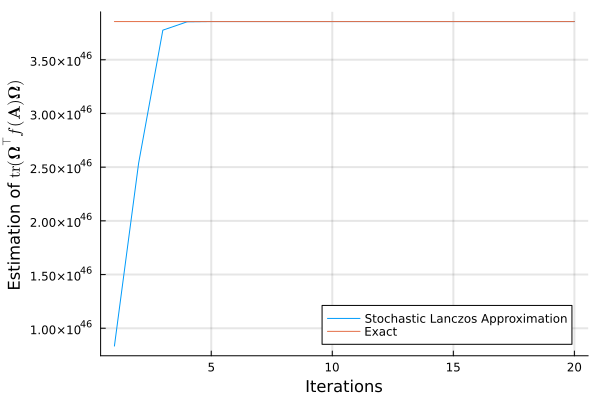

In [10]:
using LaTeXStrings

plot(ks, lanczos_approx, label="Stochastic Lanczos Approximation", xlabel="Iterations", 
    ylabel="Estimation of " * L"\mathrm{tr}(\mathbf{\Omega}^\top f(\mathbf{A})\mathbf{\Omega})", gridlinewidth=2)
plot!(ks, fill(real(exact), N), label="Exact")